**Tarea ensamble**

**Santiago Giraldo Salazar**

Iniciamos entrando al NCBI utilizando el siguiente link: https://www.ncbi.nlm.nih.gov/sra?term=PRJNA926949&cmd=DetailsSearch y descargamos el archivo de ID SRR23493803 

Posterior a esto, cargamos la secuencia en apolo utilizando la siguiente linea de comando: 


In [ ]:
scp /Users/saragiraldo/Downloads/secuencia_santi.fastq sgiraldos3@apolo.eafit.edu.co:/home/sgiraldos3/slurm

Depues activamos el ambiente de conda

In [ ]:
(base) [sgiraldos3@apolo slurm]$ conda activate kneumo_ensamble

Corremos la secuencia en apolo utilizando la siguiente linea de comando

In [ ]:
(kneumo_ensamble) [sgiraldos3@apolo slurm]$ fastqc secuencia_santi.fastq

Descargamos el resultado en la maquina y obtenemos lo siguiente:
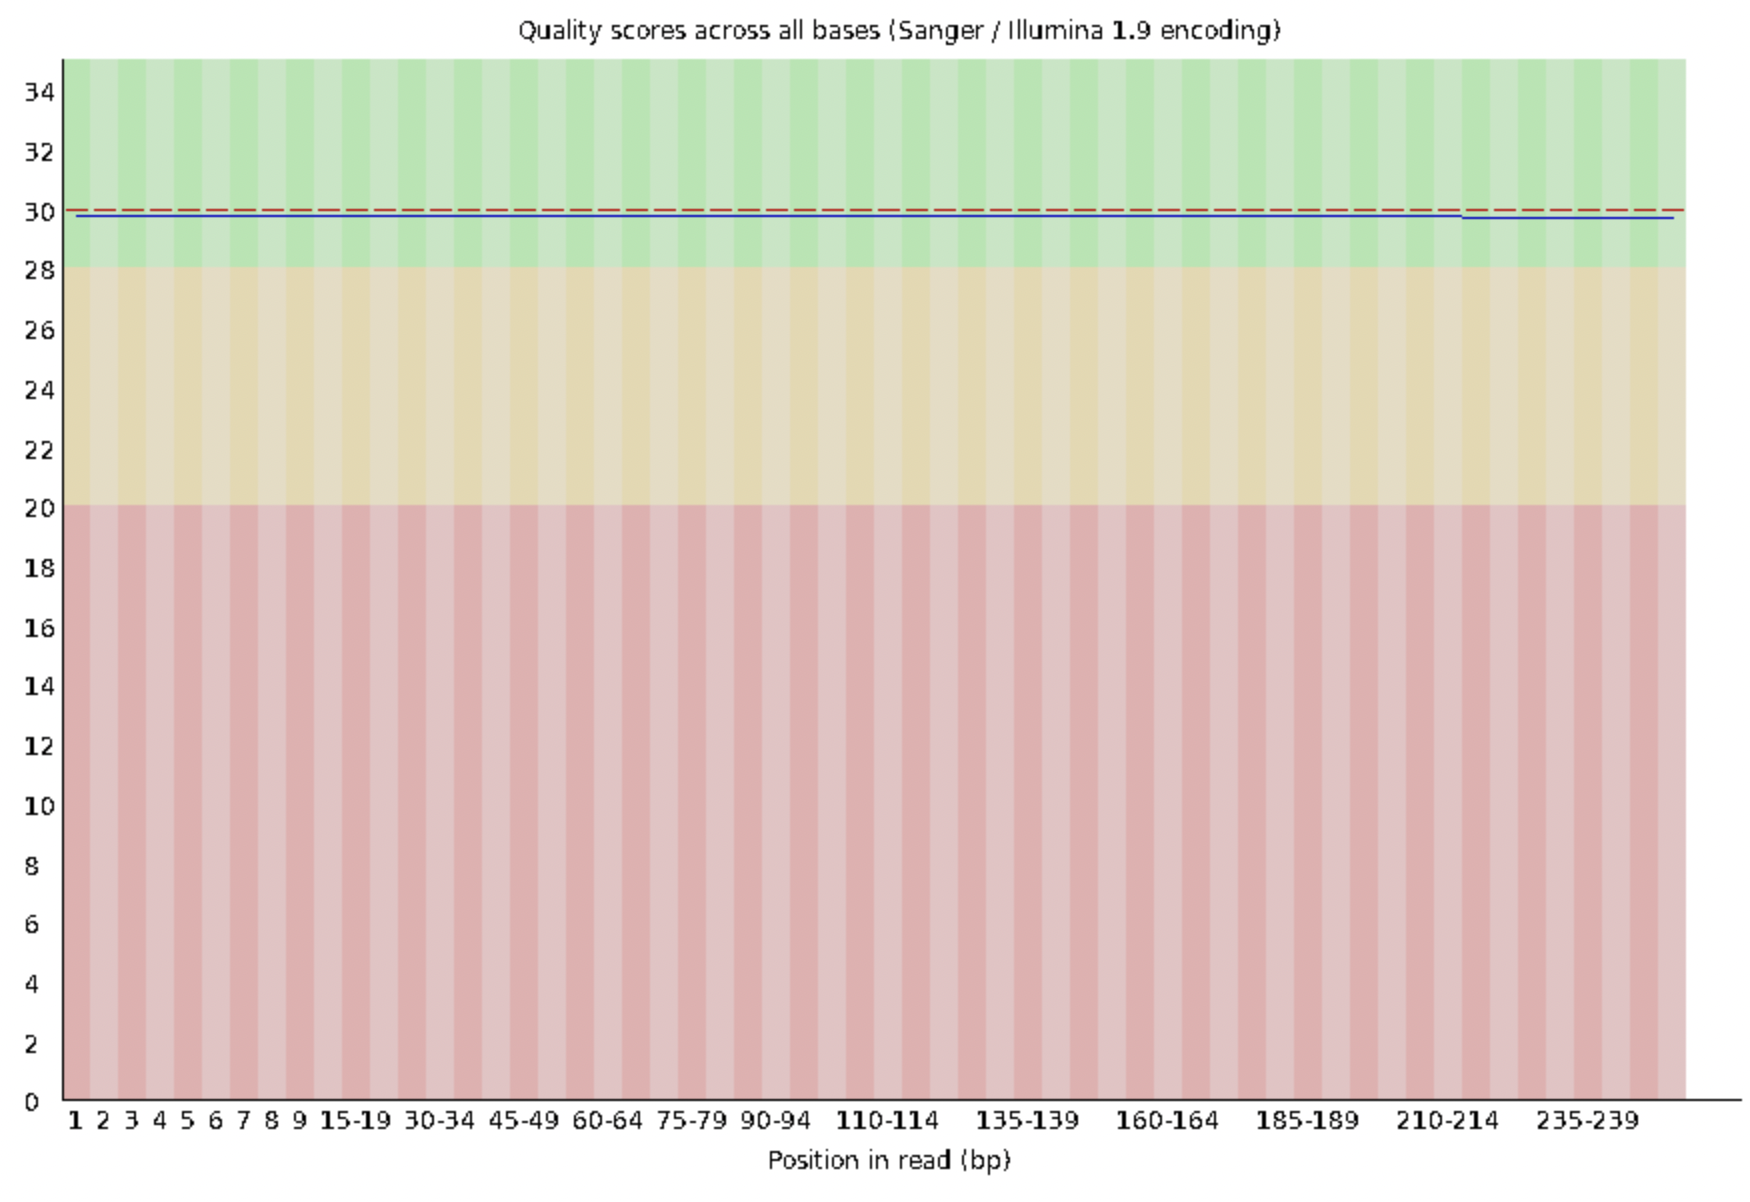

Lo que podemos ver en este ensamble es que la secuencia posee una alta calidad, por lo que en realidad no necesitaría ser tratada, a pesar de esto, con el objetivo de llevar a cabo un ejercicio práctico, se aplicarán todos los pasos vistos en clase. 

Procedemos a realizar el trimado de la secuencia utilizando la siguiente linea de comando: 

In [ ]:
(kneumo_ensamble) [sgiraldos3@apolo slurm]$ trimmomatic SE -phred33 secuencia_santi.fastq secuencia_trimada.fastq SLIDINGWINDOW:4:20 MINLEN:25
(kneumo_ensamble) [sgiraldos3@apolo slurm]$ fastqc secuencia_trimada.fastq
(base) saragiraldo@MacBook-Air-de-Santiago Downloads % scp sgiraldos3@apolo.eafit.edu.co:/home/sgiraldos3/slurm/secuencia_trimada_fastqc.html 


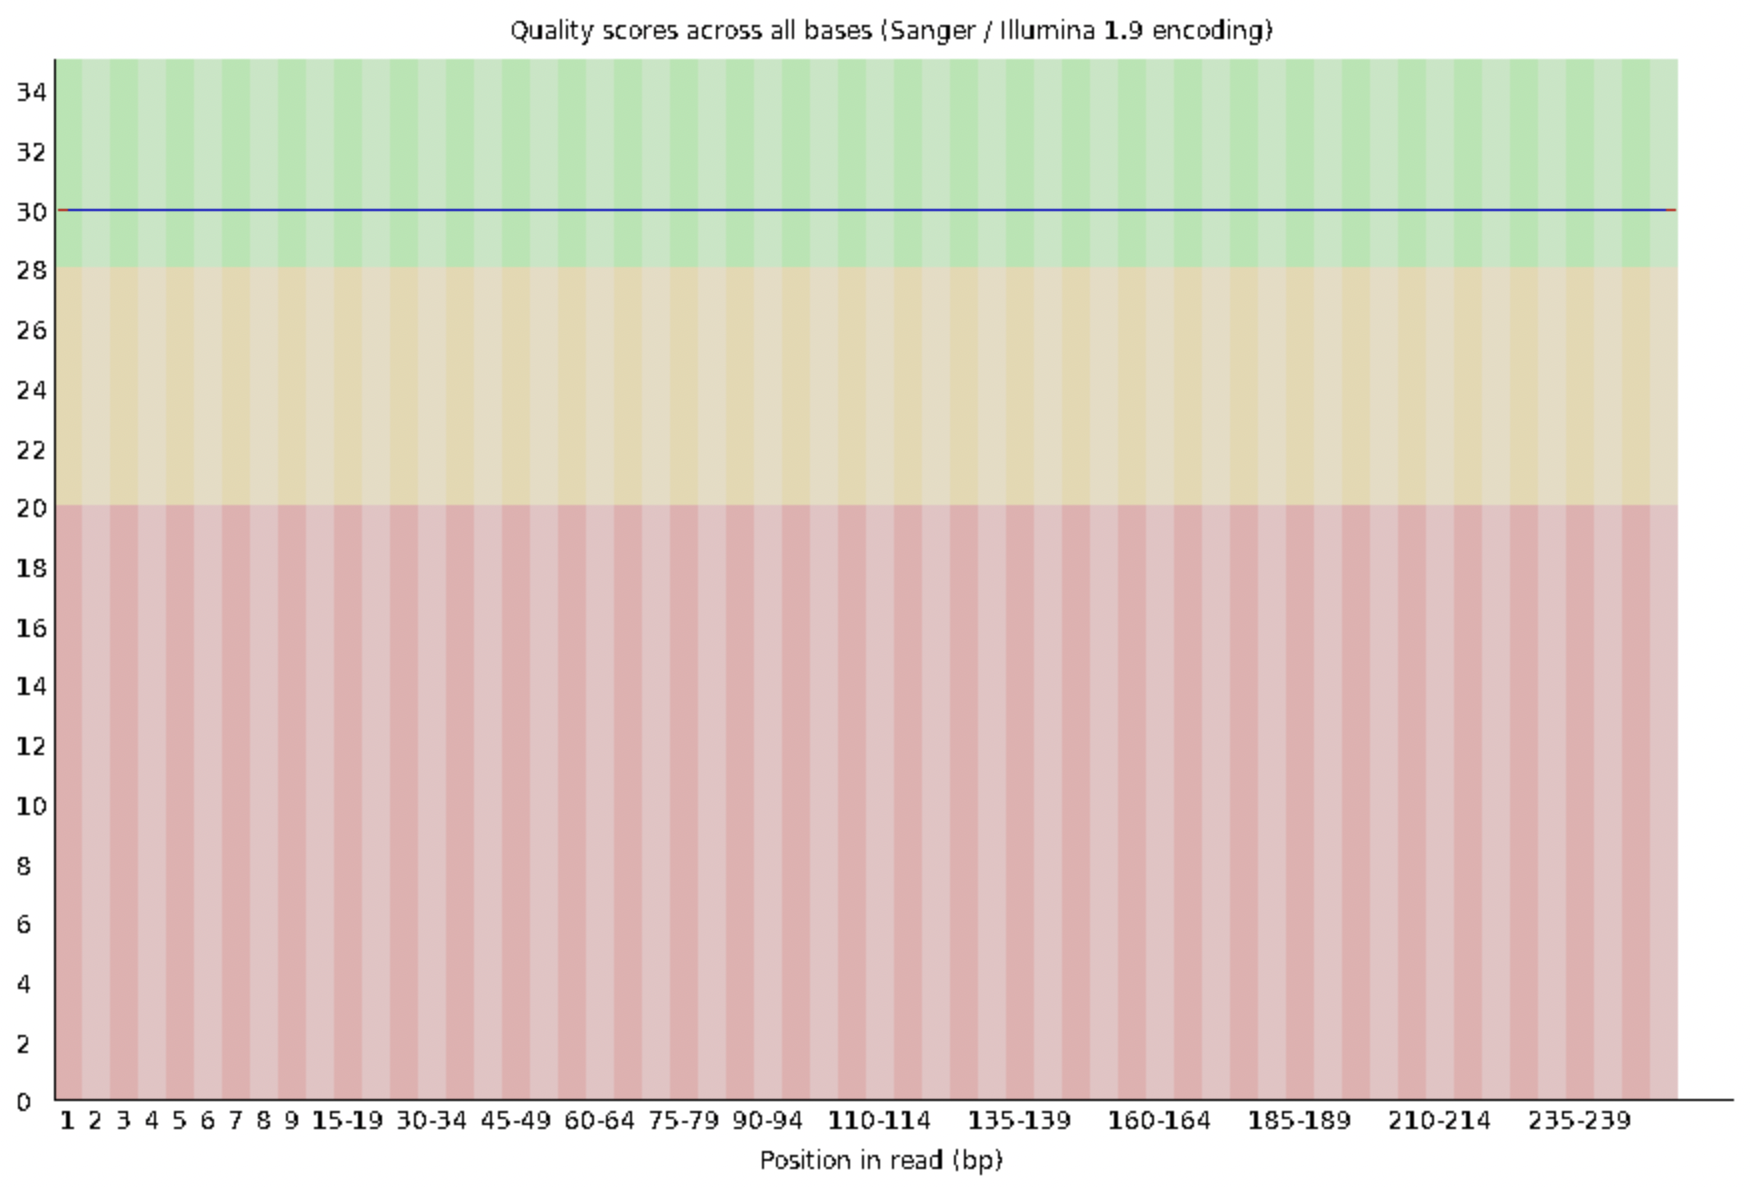


Como podemos observar la calidad de la secuencia mejoró despues del trimado por lo que: 
Posterior a el trimado procedemos con el ensamble utilizando las siguientes lineas de codigo

In [ ]:
#!/bin/bash
  
#SBATCH --partition=learning                   # Partition
#SBATCH --nodes=1
#SBATCH --ntasks=1                              # Number of tasks (processes)
#SBATCH --time=01:00:00                           # Walltime
#SBATCH --job-name=test_gpu                     # Job name
#SBATCH --output=%x_%j.out                      # Stdout (%x-jobName, %j-jobId)
#SBATCH --error=%x_%j.err                       # Stderr (%x-jobName, %j-jobId)
#SBATCH --mail-type=ALL                         # Mail notification
#SBATCH --mail-user=sgiraldos3@eafit.edu.co       # User Email


##### ENVIRONMENT CREATION #####
module load python/3.6.0_miniconda-4.3.11_gcc-11.2.0
source activate kneumo_ensamble

##### JOB COMMANDS #### 
abyss-pe k=10 se=secuencia_trimada.fastq name=Ensamble1 'unitigs'
abyss-pe k=50 se=secuencia_trimada.fastq name=Ensamble2 'unitigs'
abyss-pe k=100 se=secuencia_trimada.fastq name=Ensamble3 'unitigs'

Del corrido abyss-pe k=10 se=secuencia_trimada.fastq name=Ensamble1 'unitigs' obtenemos la siguiente tabla: 

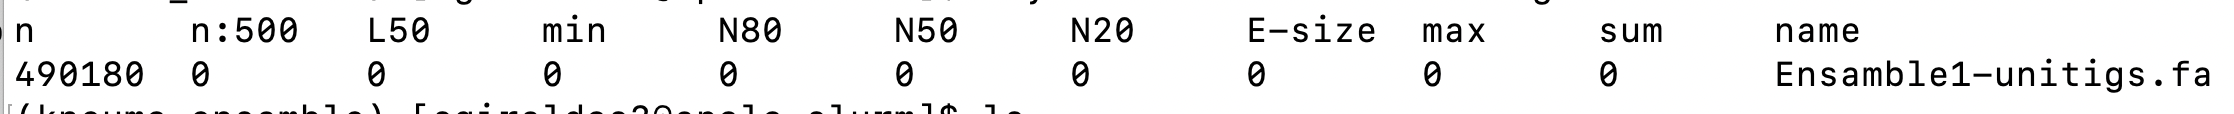

Esto nos indica que el numero de kmers no fue sufuciente para ensamblar la secuencia

Por lo tanto, decidimos aumentarlos  con K=50 

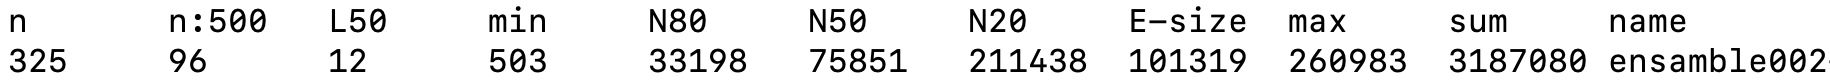

Al comparar este resultado con las estadisticas globales del genoma, encontramos que si bien los valores de L50 se encuentran cerca, podriamos acercarnos más, por esta razon corremos el código con K=100

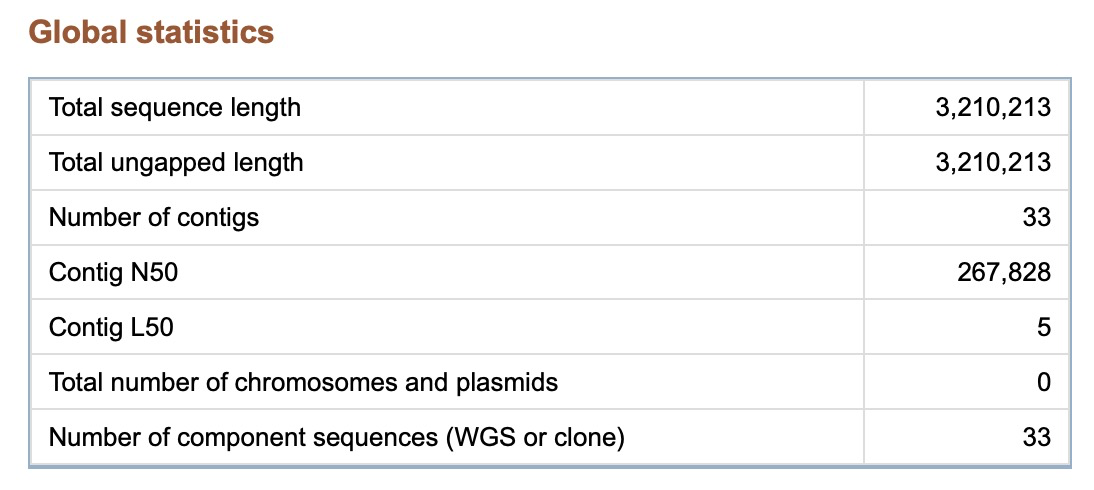

En este caso decidimo verificar los valores obtenidos en nuestro experimento y compararlos con los datos recopilados del NCBI, los resultados del NCBI los tenemos en la tabla anterior, en ese resultado podemos ver que el L50 es de 5 y el que nosotros obtuvimos con 50 kmers fue de L50=12

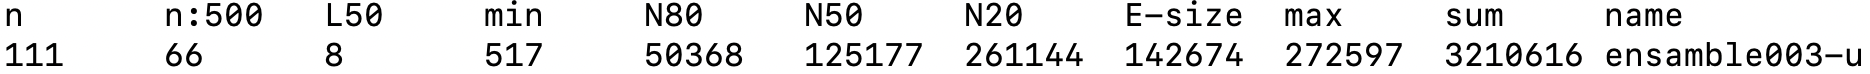

Ahora, observamos que con un valor de K=100, nuestro valor de L50=8, tan solo 3 puntos por encima del global lo que quiere decir que la calidad de esta secuencia aumento con el trimado realizado y a pesar de que podíamos intentar acercarnos más al valor global se tomo la decisión de no hacerlo ya que esto podría afectar el resultado del ensamble y darnos resultados no favorables. 